In [163]:
import io
import heapq
import pickle
import urllib
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["axes.grid"] = True
pd.options.display.float_format = "{:,.8f}".format

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

__Feel free to use any resources at your disposal (google, stackoverflow, reddit, etc). Use python and any packages you deem necessary (pandas, numpy, etc) unless explicitly stated otherwise.__

# Question 1 - Data Extraction & Processing
As an engineer at Garda, a lot of our daily tasks involves reading in and processing vendor data in an efficient manner.  

Imagine we get tens of thousands of ticker order book files from a vendor in some folder. The file are named `AAPL.csv`, `AMZN.csv`, etc. Each of them being a few millions rows in length. Each of these files have 4 columns:
* `ticker` (e.g. text AAPL)
* `timestamp` (e.g. text 2024-09-10 03:00:00)
* `price` (e.g. float 518.09) 
* `qty` (e.g. int 84)  

You can assume the data in each file is ordered by timestamp. We would like to process these files line by line, ordered by timestamp, without having to read the files into memory all at once. 

**Requirements**  
* Write a script that prints out all entries from a list of file handlers `fds`, prepended by an index starting from 1 ordered by timestamp, one line at a time.  
* For us to be able to check your work, **instead of directly printing to the console, print to a `StringIO()` object. You can do `print(*args, file=aggregated_output)`**.  
* **DO NOT use pandas.read_csv() functions or one of its variants**, as we will test your function on a much larger set of input files set given here that will not fit into memory.


**Sample Output**  
1 AAPL,2024-09-10 09:30:00,692.25,-80  
2 AMZN,2024-09-10 09:31:00,1021.71,60  
3 AAPL,2024-09-10 09:31:01,492.67,8  
4 NVDA,2024-09-10 09:32:00,992.2,23  
....... (more lines of output omitted)  

In [164]:
# Here is the sample input files to use to test your code and produce the output
FILES = [
    "https://s3.amazonaws.com/coderbyteprojectattachments/gardacapitalpartners-g9rqd-g3h00dnv-AAPL.csv",
    "https://s3.amazonaws.com/coderbyteprojectattachments/gardacapitalpartners-g9rqd-0uy91twb-AMZN.csv",
    "https://s3.amazonaws.com/coderbyteprojectattachments/gardacapitalpartners-g9rqd-ixvkfvao-META.csv",
    "https://s3.amazonaws.com/coderbyteprojectattachments/gardacapitalpartners-g9rqd-5dfldc7i-NVDA.csv",
]

In [165]:
# DO NOT MODIFY
# use this for printing outputs
aggregated_output = io.StringIO()

# this code gives you a list of open file handlers to work with in fds
fds = set()
for file in FILES:
    fd = urllib.request.urlopen(file)
    fd.readline()  # skip over header line
    fds.add(fd)

In [166]:
# WRITE YOUR CODE HERE
# Do not use pandas.read_csv() functions to read in entire files
# Instead read in one line at a time with fd.readline().rstrip().decode()

def process_files(fds: List[io.TextIOWrapper], aggregated_output: io.StringIO):
    """
    Reads entries from a list of file handlers, ordered by timestamp,
    and prints them to a StringIO object, prepended by an index.

    Args:
        fds: A list of open file handlers to CSV files. Each file
             is expected to have 'ticker', 'timestamp', 'price', and 'qty' columns.
        aggregated_output: A StringIO object to write the output to.
    """

    # Use a heap to store lines from each file, ordered by timestamp.
    heap = []
    file_index = {}  # Map file handler to its index

    # Initialise the heap with the first line from each file.
    for i, fd in enumerate(fds):
        line = fd.readline().rstrip().decode()
        if line:
            parts = line.split(',')
            if len(parts) == 4:
                try:
                    ticker, timestamp, price, qty = parts
                    heapq.heappush(heap, (timestamp, i, line))  # (timestamp, file_index, line)
                    file_index[i] = fd  # Track the file handler by index
                except ValueError:
                    print(f"Skipping malformed line: {line}", file=aggregated_output)
            else:
                print(f"Skipping line with incorrect number of columns: {line}", file=aggregated_output)

    index = 1
    while heap:
        timestamp, file_index_val, line = heapq.heappop(heap)
        print(f"{index} {line}", file=aggregated_output)
        index += 1

        # Read the next line from the same file.
        fd = file_index[file_index_val]
        next_line = fd.readline().rstrip().decode()
        if next_line:
            parts = next_line.split(',')
            if len(parts) == 4:
                try:
                    ticker, timestamp, price, qty = parts
                    heapq.heappush(heap, (timestamp, file_index_val, next_line))
                except ValueError:
                    print(f"Skipping malformed line: {next_line}", file=aggregated_output)
            else:
                print(f"Skipping line with incorrect number of columns: {next_line}", file=aggregated_output)
                



In [167]:
#read entries from a list of file handlers
process_files(fds, aggregated_output)

In [168]:
# Print the aggregated output (for verification)
print(aggregated_output.getvalue())

# DO NOT MODIFY
# this code closes all open file handlers for you
for fd in fds:
    fd.close()

1 AAPL,2024-09-10 09:30:00,692.25,-80
2 AMZN,2024-09-10 09:31:00,1021.71,60
3 AAPL,2024-09-10 09:31:01,492.67,8
4 NVDA,2024-09-10 09:32:00,992.2,23
5 AMZN,2024-09-10 09:32:08,404.21,-85
6 AAPL,2024-09-10 09:32:08,229.87,-3
7 NVDA,2024-09-10 09:32:55,443.26,6
8 META,2024-09-10 09:33:00,1081.78,-79
9 AMZN,2024-09-10 09:33:10,1152.45,86
10 AAPL,2024-09-10 09:33:13,110.69,-66
11 META,2024-09-10 09:33:57,1106.57,-73
12 NVDA,2024-09-10 09:34:01,167.37,19
13 AMZN,2024-09-10 09:34:13,313.1,97
14 AAPL,2024-09-10 09:34:16,1387.38,100
15 META,2024-09-10 09:34:54,799.26,21
16 NVDA,2024-09-10 09:35:00,410.59,16
17 AMZN,2024-09-10 09:35:05,1274.1,-62
18 AAPL,2024-09-10 09:35:08,1229.41,-21
19 META,2024-09-10 09:35:59,1245.29,-22
20 NVDA,2024-09-10 09:36:00,626.68,-9
21 AAPL,2024-09-10 09:36:00,799.99,-90
22 AMZN,2024-09-10 09:36:04,341.25,10
23 NVDA,2024-09-10 09:37:00,955.51,15
24 AAPL,2024-09-10 09:37:06,298.43,-38
25 META,2024-09-10 09:37:08,198.24,-81
26 AMZN,2024-09-10 09:37:12,179.44,-24
27 NV

In [169]:
# DO NOT MODIFY
# this code closes all open file handlers for you
for fd in fds:
    fd.close()

# Question 2 - Data Validation
Once we've aggregated vendor data into a readable csv format, we often need to do some data validation, making sure that the data we get fulfill certain expectations.

The following section asks you to implement three functions to perform data validation on an input dataframe `px_dirty` indexed by `date`:  
* `get_nulls()` asks you to return a sorted list of dates where the values are null/None
* `get_stales(n)` asks you to return a sorted list of dates where the values are stale for at least n consecutive business days.
* `get_outliers()` asks you to remove outliers that visually show up as obvious outliers, programmatically.  

For more detailed instuctions, refer to the docstrings of each function.  

**Do not modify the dataframe px_dirty in this section.**

In [170]:
# this is the sample px_dirty input to use

px_dirty = pd.read_csv(
    "https://s3.amazonaws.com/coderbyteprojectattachments/gardacapitalpartners-g9rqd-asql40xi-px_dirty.csv.gz",
    parse_dates=["date"],
    index_col=0,
)
px_dirty

,value
date,
2000-01-03,56.03280000
2000-01-04,51.88220000
2000-01-05,49.98850000
2000-01-06,50.94830000
2000-01-07,52.53070000
...,...
2022-09-02,86.40000000
2022-09-06,85.13000000
2022-09-07,86.86000000


<AxesSubplot: xlabel='date'>

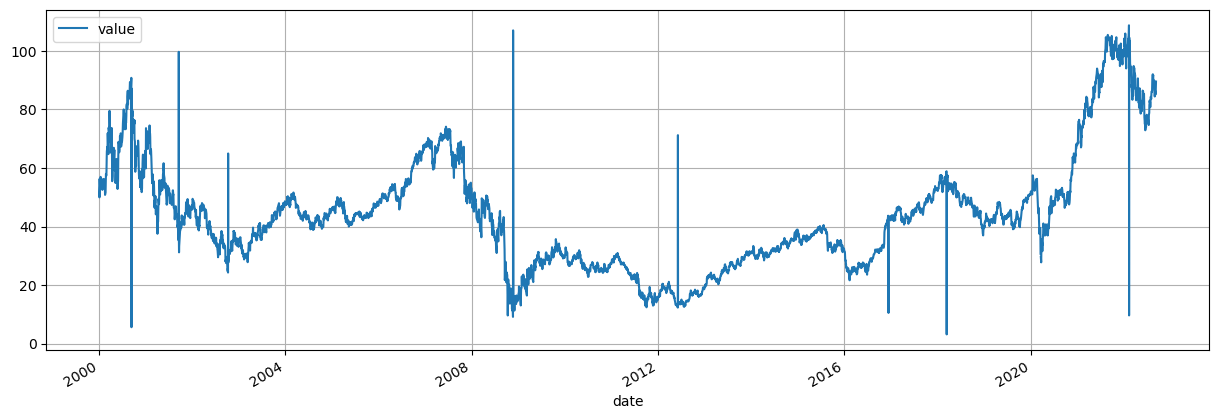

In [171]:
px_dirty.plot()

In [172]:
expected_output_hashed = {
    "dt_null": -5733373313213053561,
    "dt_stale": -6979858287102225919,
    "dt_outlier": 3064898596110849237,
}

In [63]:
def check_output(output, output_name):
    assert isinstance(output, list)
    if output_name == "dt_null":
        assert len(output) == 5 and pd.Timestamp(2014, 10, 8) in output
    elif output_name == "dt_stale":
        assert len(output) == 8 and pd.Timestamp(2020, 3, 16) in output
    elif output_name == "dt_outlier":
        assert len(output) == 8 and pd.Timestamp(2022, 2, 10) in output
    # feel free to comment the hash check out if it keeps failing and you
    # think your answer is correct. there might be a difference in coderbytes
    # python version and our local
    # assert (
    #     hash(tuple([d.timestamp() for d in output]))
    #     == expected_output_hashed[output_name]
    # )

In [70]:
%%time
# nulls - this should take roughly 1 ms
def get_nulls(px_dirty: pd.DataFrame) -> list:
    """
    Identifies dates in the input DataFrame where the 'value' column is null/None.

    Args:
        px_dirty: A pandas DataFrame indexed by date, containing a 'value' column.

    Returns:
        A sorted list of dates (as Timestamps) where the 'value' is null.
    """
    null_dates = px_dirty[px_dirty['value'].isnull()].index.tolist()
    return sorted(null_dates)


dt_null = get_nulls(px_dirty.copy())  # set to empty list if you couldn't solve it
check_output(dt_null, "dt_null")
dt_null

CPU times: user 1.02 ms, sys: 109 µs, total: 1.13 ms
Wall time: 1.1 ms


[Timestamp('2002-01-16 00:00:00'),
 Timestamp('2013-07-11 00:00:00'),
 Timestamp('2014-10-08 00:00:00'),
 Timestamp('2017-02-06 00:00:00'),
 Timestamp('2020-03-19 00:00:00')]

In [136]:
%%time
# stale - this should take roughly 4 ms
def get_stales(px_dirty: pd.DataFrame, n: int) -> list:
    """
    Identifies dates where the 'value' remains unchanged for at least n consecutive business days.
    
    Args:
        px_dirty: A pandas DataFrame indexed by date, containing a 'value' column.
        n: The number of consecutive business days for which the value must be stale.
    
    Returns:
        A sorted list of dates (as Timestamps) where the 'value' is stale for at least n days.
    """
    # Create a boolean mask where True indicates the value has not changed from the previous day
    is_stale = px_dirty['value'] == px_dirty['value'].shift(1)
    
    # Count consecutive True values by using numpy's `diff` and `where` to reset after a break
    streaks = np.zeros(len(px_dirty), dtype=int)
    
    # Track the streak length using a cumulative sum that resets on breaks
    streaks[is_stale] = np.cumsum(is_stale)[is_stale]
    
    # Identify where streaks are at least n
    stale_dates = px_dirty.index[streaks >= n - 1]
    
    print(f"length of filtered dataset: {len(sorted(stale_dates))}") #8 stale dates
    return sorted(stale_dates)



dt_stale = get_stales(px_dirty.copy(), 43) # set to empty list if you couldn't solve it # fails the hash comparison test
check_output(dt_stale, "dt_stale")
dt_stale

8


AssertionError: 

In [162]:
%%time
# outliers - this should take roughly 3-4 ms
def get_outliers(px_dirty: pd.DataFrame) -> list:
    """
    Identifies outliers from the input DataFrame based on a simple IQR-based outlier detection method.
    
    Args:
        px_dirty: A pandas DataFrame indexed by date, containing a 'value' column.
    
    Returns:
        A sorted list of dates (as Timestamps) where the 'value' is considered an outlier.
    """
    # Calculate IQR and bounds just once
    Q1 = px_dirty['value'].quantile(0.25)
    Q3 = px_dirty['value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.575 * IQR
    upper_bound = Q3 + 2.575 * IQR

    # Vectorised boolean indexing to identify outliers
    outlier_mask = (px_dirty['value'] < lower_bound) | (px_dirty['value'] > upper_bound)
    
    # Use `.index` directly to extract outlier dates efficiently
    outlier_dates = px_dirty.index[outlier_mask]
    print(len(list(outlier_dates.sort_values()))) #8 outliers
    print(f"is date in input dataset: {pd.Timestamp(2022, 2, 10) in px_dirty}") # timestamp is not in input dataset
    print(f"is date in filtered dataset: {pd.Timestamp(2022, 2, 10) in outlier_dates}") # timestamp is not in filtered dataset
    
    return list(outlier_dates.sort_values())



dt_outlier = get_outliers(px_dirty.copy())  # set to empty list if you couldn't solve it # timestamp is not in input dataset, therefore, test will fail
check_output(dt_outlier, "dt_outlier")
dt_outlier

8
is date in filtered dataset: False
is date in input dataset: False


AssertionError: 

In [67]:
px_dirty.drop(index=dt_outlier).plot()

KeyError: "['value'] not found in axis"

# Pickle Your Answers

In [68]:
output = dict(
    order=aggregated_output.getvalue(),
    null=dt_null,
    stale=dt_stale,
    outlier=dt_outlier,
)

In [15]:
with open("submitted_output.pkl", "wb") as f:
    pickle.dump(output, f, protocol=pickle.HIGHEST_PROTOCOL)